# TTC Line 2 Arrival Time by Bohan

### Things to improve
1. Remove Trains that are outside of service time
2. Trains should not be at 2 stations at the same time
3. Switch station id for transfer stations

#### It makes basic explation on the simple data set

In [1]:
import numpy as np;  # useful for many scientific computing in Python
import pandas as pd; # primary data structure library

responses = pd.read_csv('responses.csv'); # import file
requests = pd.read_csv('requests.csv'); # import file


#### Select Line 2 trains At Station

In [2]:
# Line 2 (BD) trains
trains_BD = responses[responses['subwayline'] == 'BD'];
trains_BD_AtStation = trains_BD[trains_BD['train_message'] == 'AtStation'];
# sample train
# train_example = trains_BD_AtStation[trains_BD_AtStation['trainid'] == 207];

#### Find arrival time and separate date and time

In [3]:
# arrival time by station
merged = pd.merge(left=trains_BD_AtStation, right=requests, left_on='requestid',
                  right_on='requestid');

# check all_stations: it should be empty
merged[merged['all_stations'] != 'success']

# separate date and time
r_date = pd.to_datetime(merged['request_date']);
merged['date'] = r_date.dt.date;
merged['time'] = r_date.dt.time;

# sort by 'date','trainid','stationid','time'
merged.sort_values(by=['date','trainid','stationid','time'], inplace=True)

### Plot behaviour of one train

In [4]:
# plotting
import matplotlib.pyplot as plt

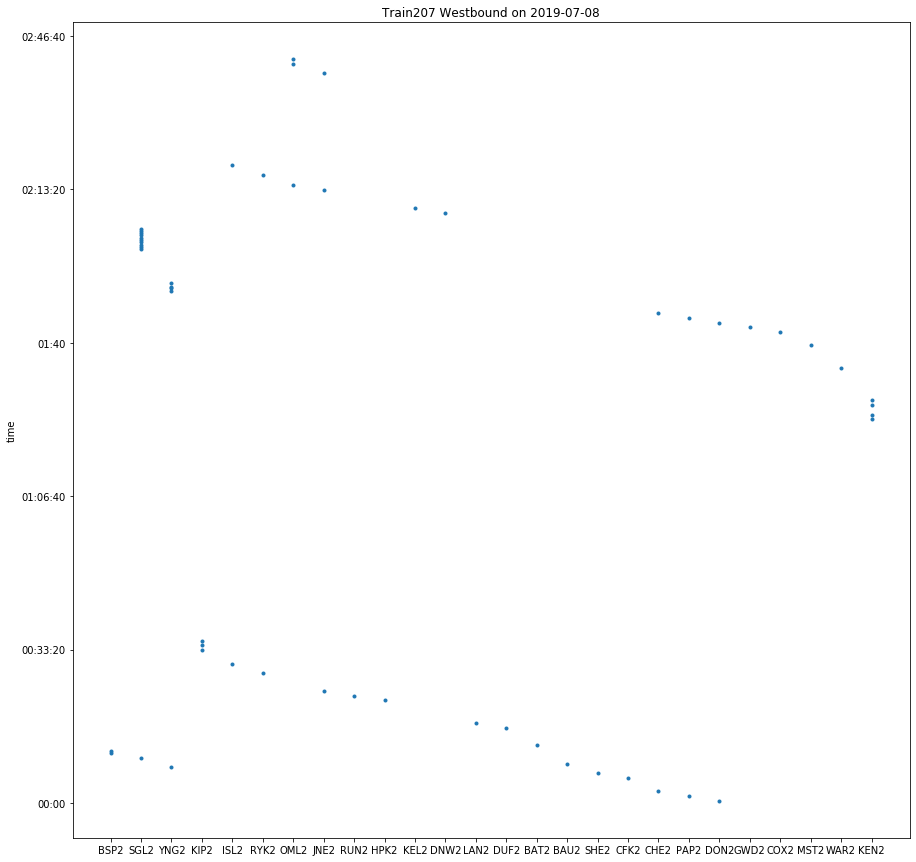

In [5]:
plt.figure(figsize=(15, 15))
plt.plot(merged[(merged['trainid'] == 207) & (merged['traindirection'] == 'West') &
                (merged['date'] == merged['date'][0])]['station_char'],
        merged[(merged['trainid'] == 207) & (merged['traindirection'] == 'West') &
                (merged['date'] == merged['date'][0])]['time'],'.')
plt.title('Train207 Westbound on '+str(merged['date'][0]))
plt.show()

#### Comments:
1. The stationid of BSP2, SGL2, YNG2 are mislabeled for Line 1
2. Clustering shows the delay or wait time at terminals or busy downtown area
3. This train only ran for 3 hours in the morning
4. Some stations were skipped (i.e. not being labeled as AtStation?)

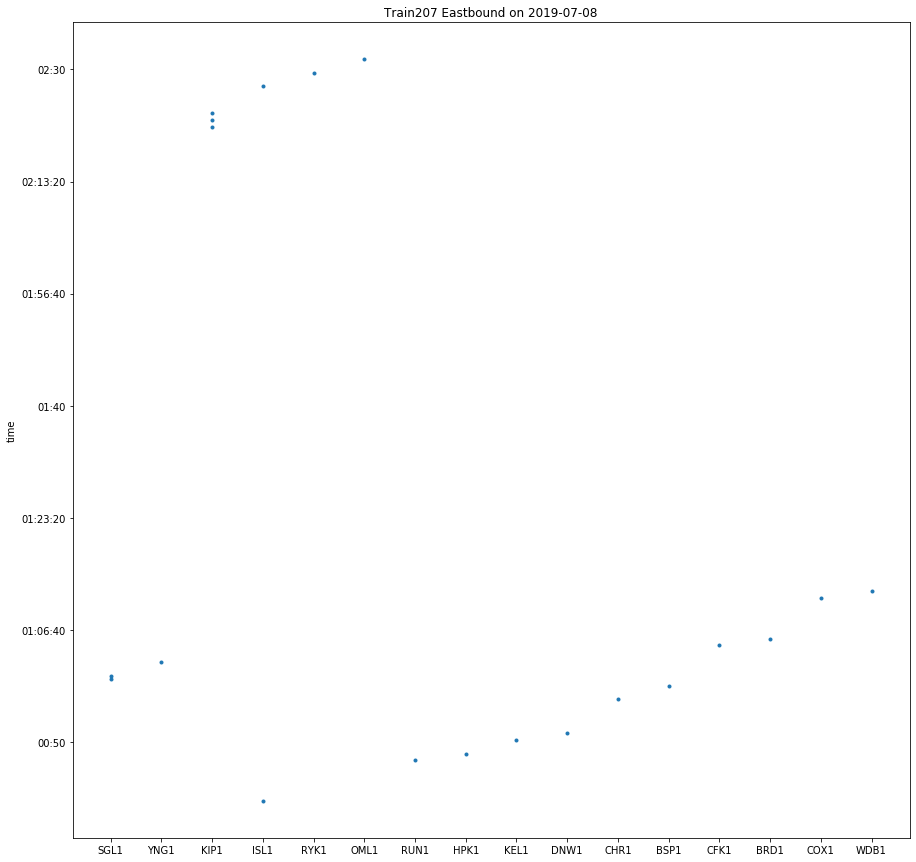

In [6]:
plt.figure(figsize=(15, 15))
plt.plot(merged[(merged['trainid'] == 207) & (merged['traindirection'] == 'East') &
                (merged['date'] == merged['date'][0])]['station_char'],
        merged[(merged['trainid'] == 207) & (merged['traindirection'] == 'East') &
                (merged['date'] == merged['date'][0])]['time'],'.')
plt.title('Train207 Eastbound on '+str(merged['date'][0]))
plt.show()

#### A different train

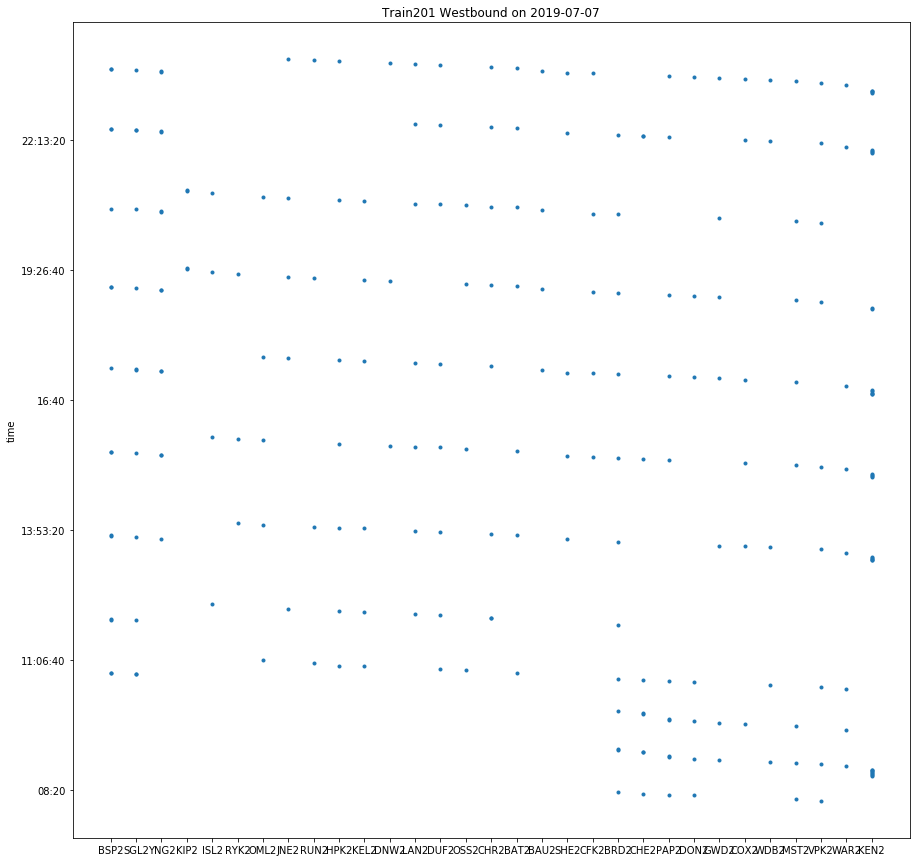

In [7]:
train = 201;
from datetime import date;
day = date(2019,7,7);
plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Westbound on '+str(day))
plt.show()

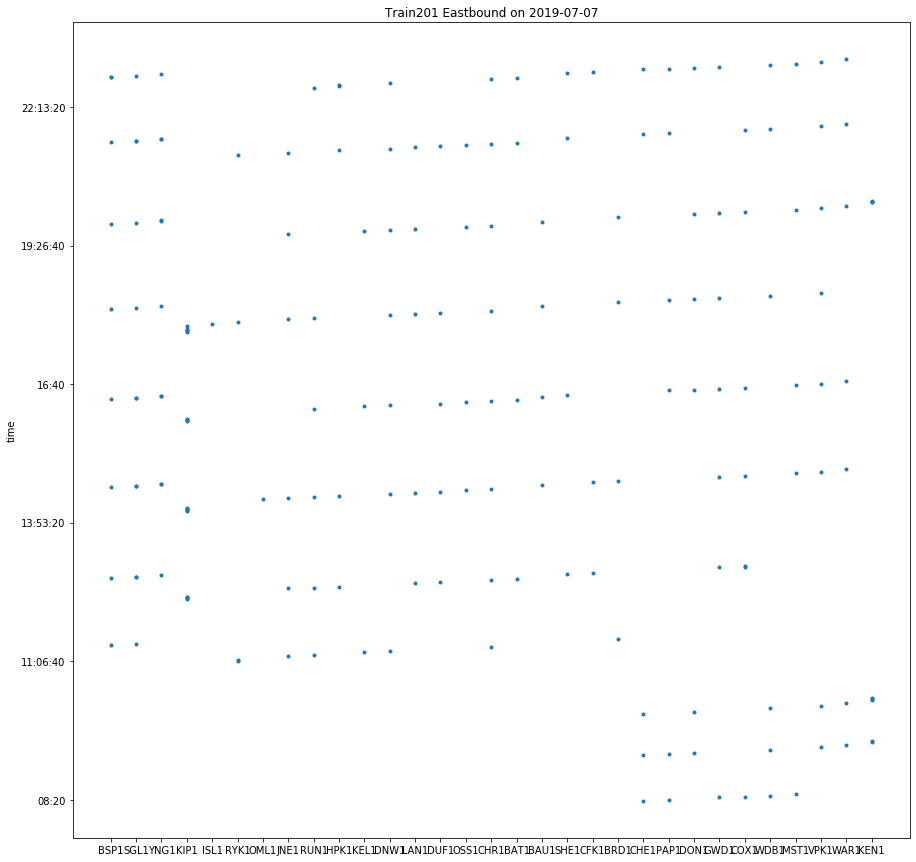

In [8]:
plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Eastbound on '+str(day))
plt.show()

### Include Delayed and Ariving trains

In [9]:
# merge two dataframes
df = pd.merge(left=responses, right=requests, left_on='requestid',
                  right_on='requestid');

## Line 2 (BD) trains
trains_BD = df[df['subwayline'] == 'BD'];
trains_BD_AtStation = trains_BD[trains_BD['train_message'] == 'AtStation'];

#### Find trains arriving from 0 to 1min (exclusive)

In [10]:
# Find trains arriving between 0 to 1 min exclusive
trains_BD_Delayed = trains_BD[(trains_BD['train_message'] == 'Delayed') &
                              (trains_BD['timint'] <1) &
                              (trains_BD['timint'] >0)];
print('Number of arriving Delayed trains: ',len(trains_BD_Delayed.index) );

trains_BD_Arriving = trains_BD[(trains_BD['train_message'] == 'Arriving') &
                              (trains_BD['timint'] <1) &
                              (trains_BD['timint'] >0)];
print('Number of arriving Arriving trains: ',len(trains_BD_Arriving.index) );

Number of arriving Delayed trains:  1906
Number of arriving Arriving trains:  22175


In [11]:
# Concatenate three dataframes
merged = pd.concat([trains_BD_AtStation, trains_BD_Arriving], axis=0);
merged = pd.concat([merged, trains_BD_Delayed], axis=0);


# separate date and time
r_date = pd.to_datetime(merged['request_date']);
merged['date'] = r_date.dt.date;
merged['time'] = r_date.dt.time;

# sort
merged.sort_values(by=['date','trainid','stationid','time'], inplace=True);

### Plot

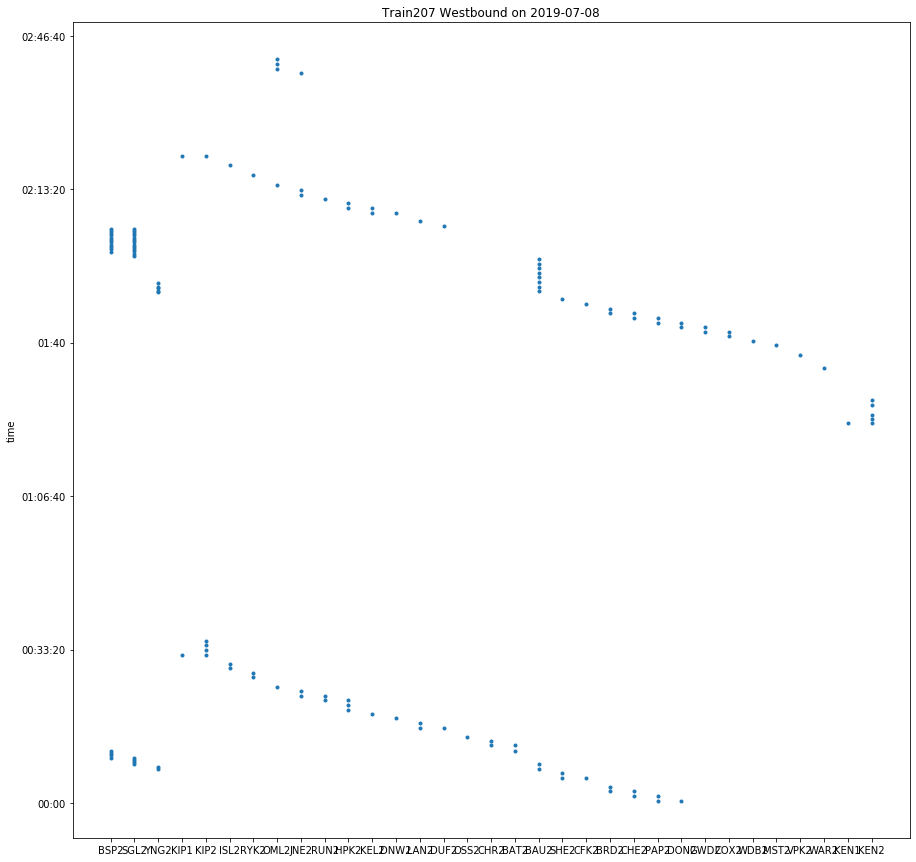

In [12]:
## plotting
import matplotlib.pyplot as plt

train = 207;
from datetime import date;
day = date(2019,7,8);

plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Westbound on '+str(day))
plt.show()

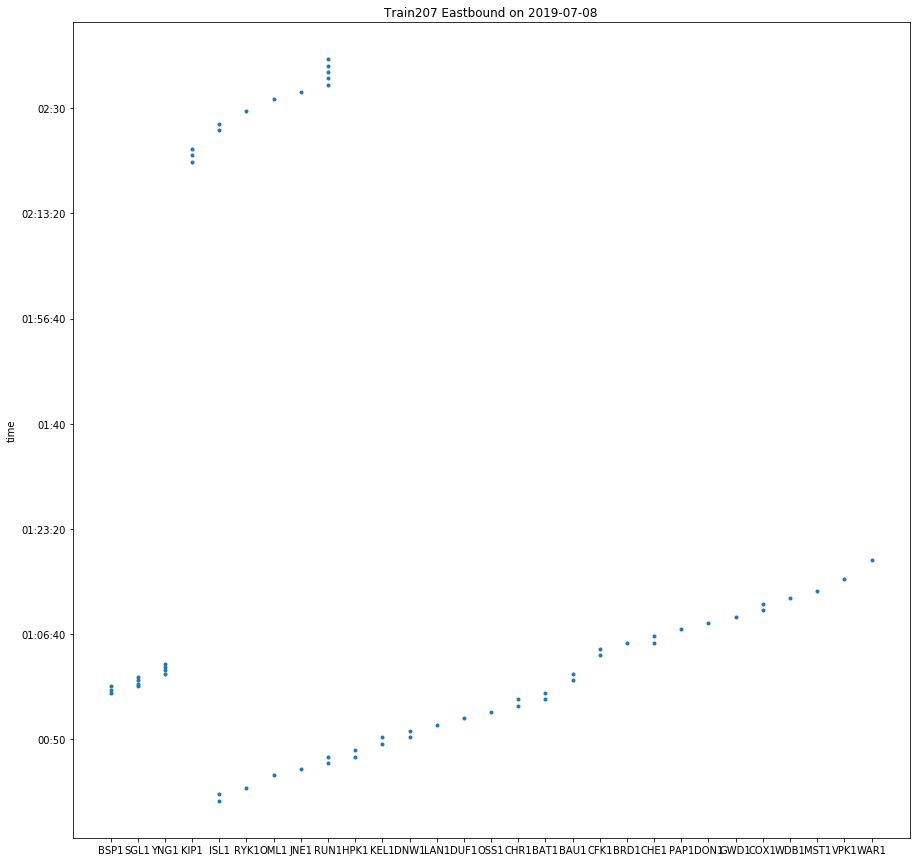

In [13]:
plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Eastbound on '+str(day))
plt.show()

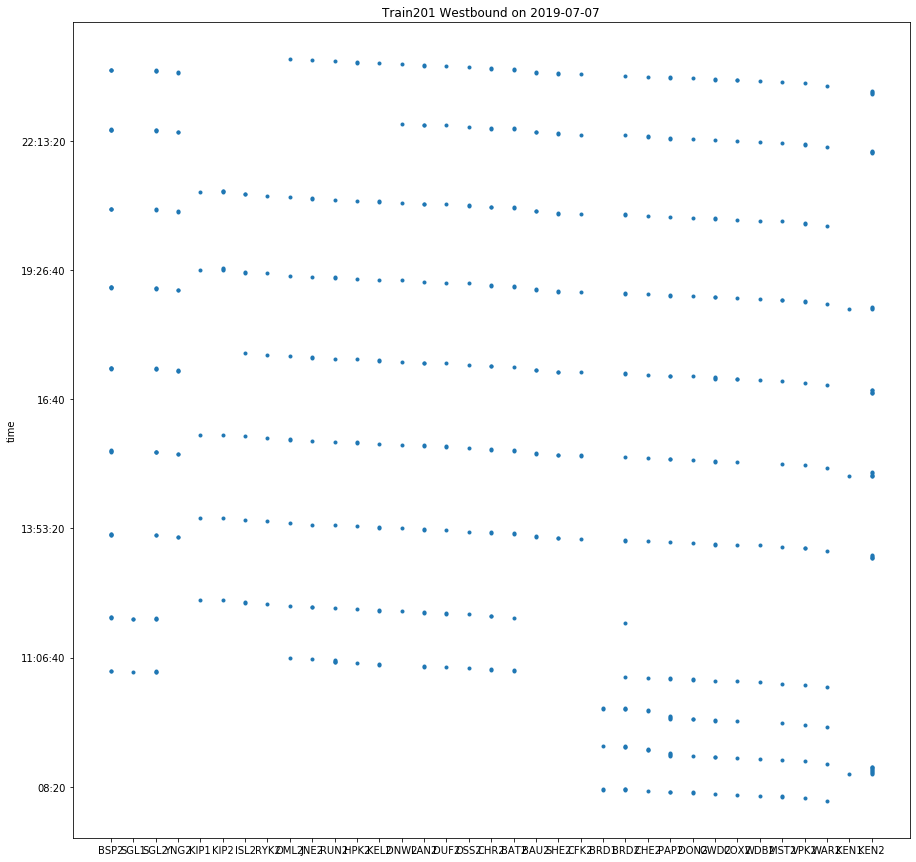

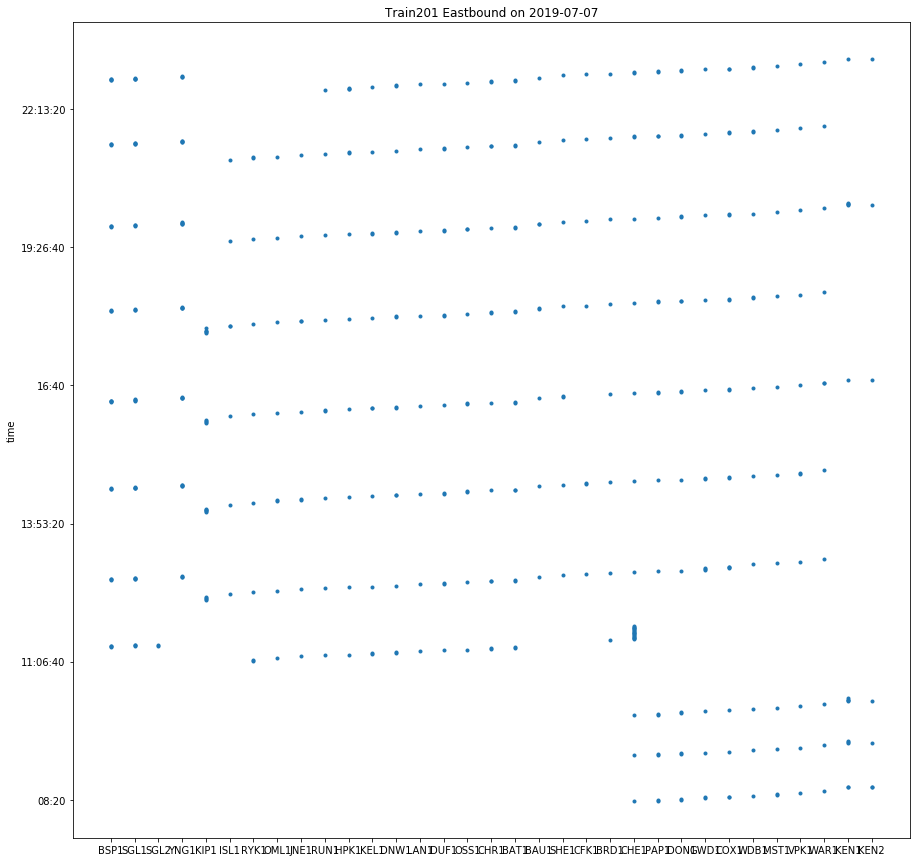

In [14]:
# different train
train = 201;
from datetime import date;
day = date(2019,7,7);
plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'West') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Westbound on '+str(day))
plt.show()

plt.figure(figsize=(15, 15));
plt.plot(merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['station_char'],
        merged[(merged['trainid'] == train) & (merged['traindirection'] == 'East') &
                (merged['date'] == day)]['time'],'.')
plt.title('Train'+str(train)+' Eastbound on '+str(day))
plt.show()